### **Stroke Prediction**


## Our top priority in this health problem is to identify patients with a stroke




* According to the World Health Organization(WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender,age,various diseases, and smoking status.
* Each row in the data provides relevant information about the patient.




**Attribute** **Information**

* 1)id:-unique identifier
* 2)gender:-male,female & other
* 3)age:age of the patient
* 4)Hypertension:-0 if patient doesn't have hypertension,1 if the patient has   hypertension
* 5)heart_disease:0 if patient doesn't have any heart disease ,1 if patient has heart disease
* 6)ever_married:-"No" or "yes"
* 7)work_type:-"children","Govt_job","Never_worked","private", or "self-employed"
* 8)Residence_type:"Rural" or "Urban"
* 9)avg_glucose_level:-average glucose level in blood
* 10)BMI:-body mass index
* 11)Smoking_status:-"formerly smoked","never smoked","smokes"or "unknown"
* 12)stroke:1 if patients has stroke ,0 if not
* "Note":-unknown in smoking_status means that the information is unavailable for this patient

In [308]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [309]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
791,24108,Male,19.0,0,0,No,Private,Urban,65.61,25.1,Unknown,0
4203,751,Female,5.0,0,0,No,children,Rural,75.10,20.7,Unknown,0
395,23462,Female,17.0,0,0,No,Private,Urban,87.52,39.2,never smoked,0
899,68438,Female,51.0,0,0,Yes,Private,Rural,90.78,32.3,never smoked,0
829,26999,Male,61.0,1,1,Yes,Govt_job,Rural,86.06,34.8,never smoked,0


In [310]:
df.shape

(5110, 12)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [312]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [313]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [314]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [315]:
df.bmi.value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [316]:
print(df.bmi.mean())
print(df.bmi.median())
#both the values are almost same ,so we will replace the missing value with mean

28.893236911794673
28.1


In [317]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **EDA**

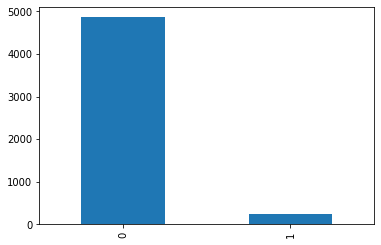

In [319]:
#value_counts() plot for all categorical values
df.stroke.value_counts().plot.bar()
#we can see that there are very less patient has stroke

In [320]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

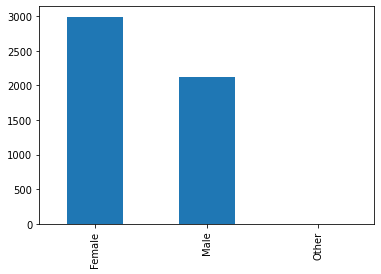

In [321]:
df.gender.value_counts().plot.bar()
#most patient are Female

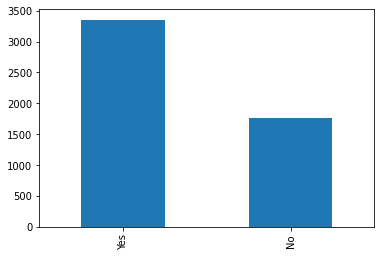

In [322]:
df.ever_married.value_counts().plot.bar()
#Most patient are married

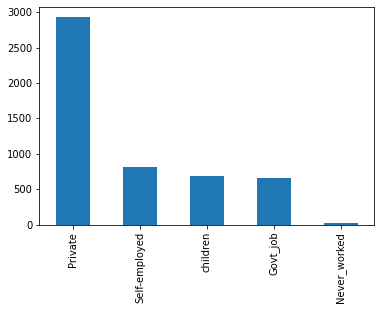

In [323]:
df.work_type.value_counts().plot.bar()
#most of the patient doing private jobs

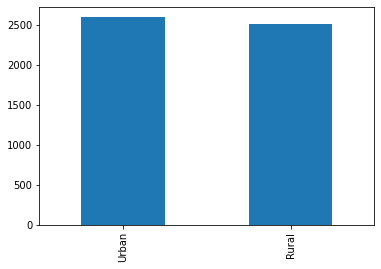

In [324]:
df.Residence_type.value_counts().plot.bar()

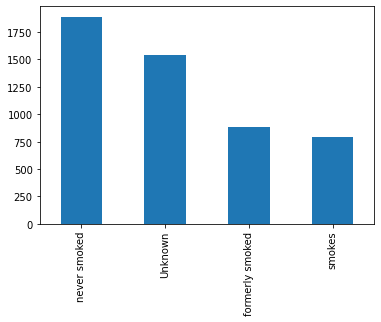

In [325]:
df.smoking_status.value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


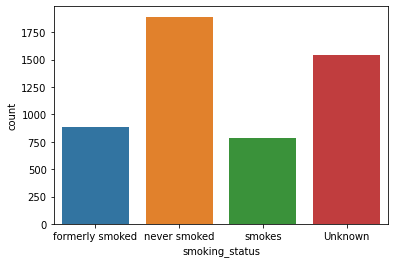

In [326]:
sns.countplot(df.smoking_status)#other way to plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


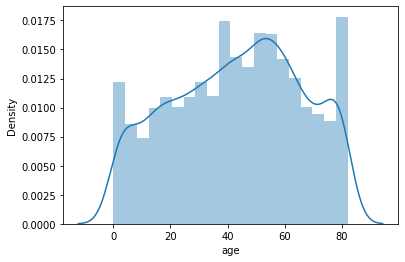

In [327]:
#dist plot of all numerical features
sns.distplot(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


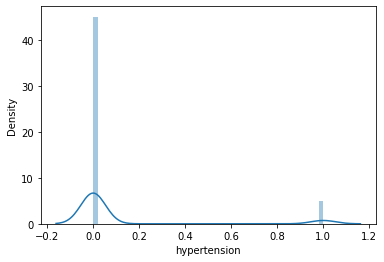

In [328]:
sns.distplot(df.hypertension)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


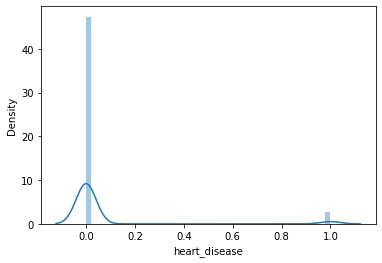

In [329]:
sns.distplot(df.heart_disease)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


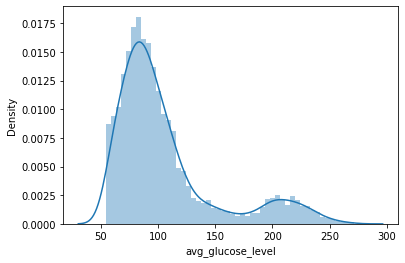

In [330]:
sns.distplot(df.avg_glucose_level)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


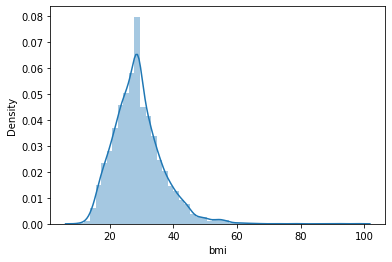

In [331]:
sns.distplot(df.bmi)

In [332]:
#to see the outlier separate out all numerical column
cols=df[["age","hypertension","heart_disease","avg_glucose_level","bmi"]]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

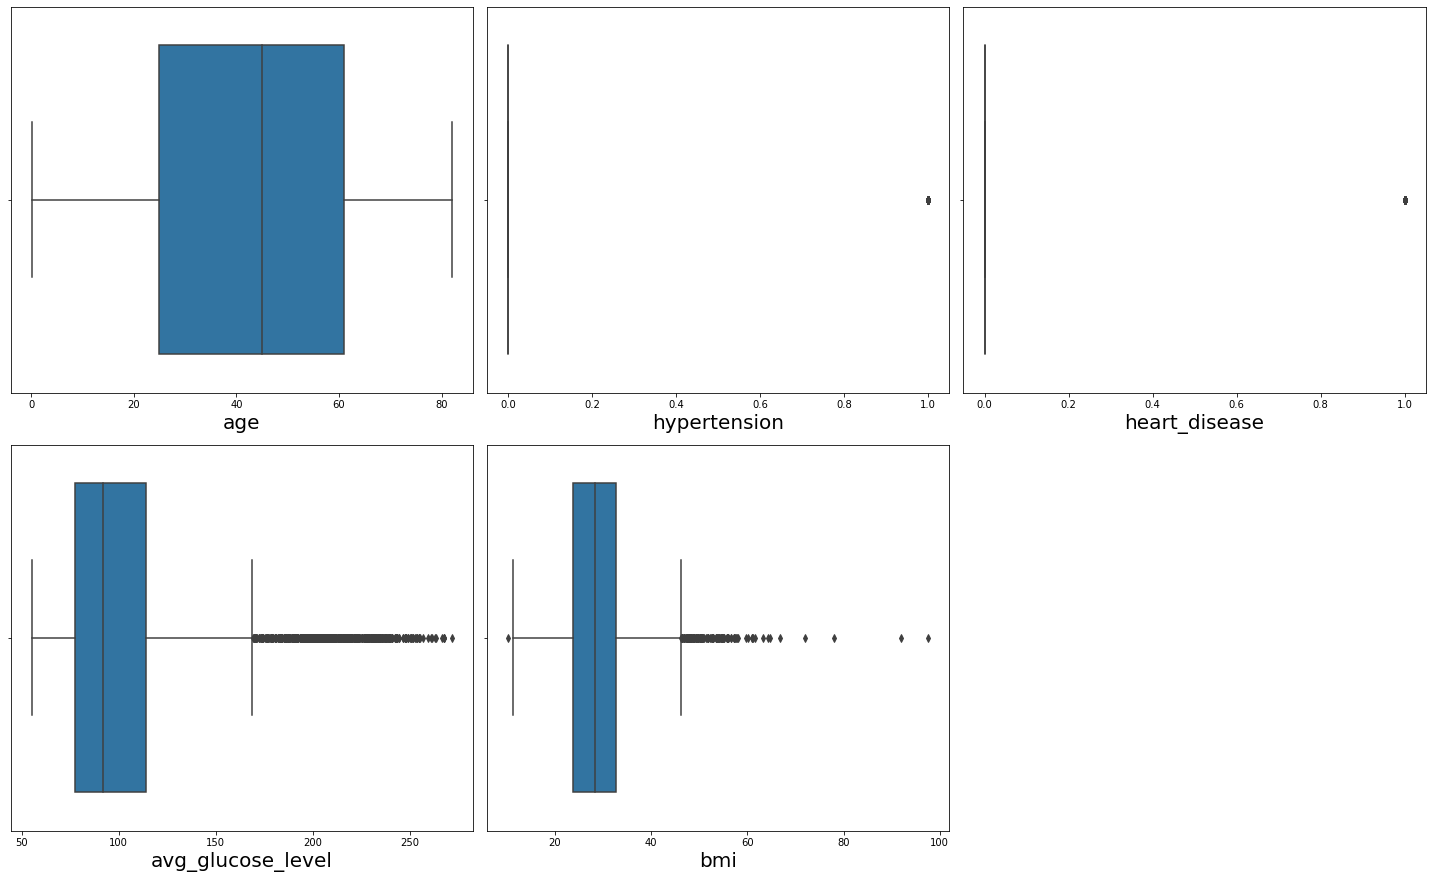

In [333]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in cols:
  if plotnumber<=15:
    ax=plt.subplot(5,3,plotnumber)
    sns.boxplot(cols[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1
plt.tight_layout()
#so we can see the outliers are present inside avg_glucose_level and bmi columns

In [334]:
#relation between categorical column and target variable
categorical_features=['gender','ever_married','work_type','Residence_type','smoking_status']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

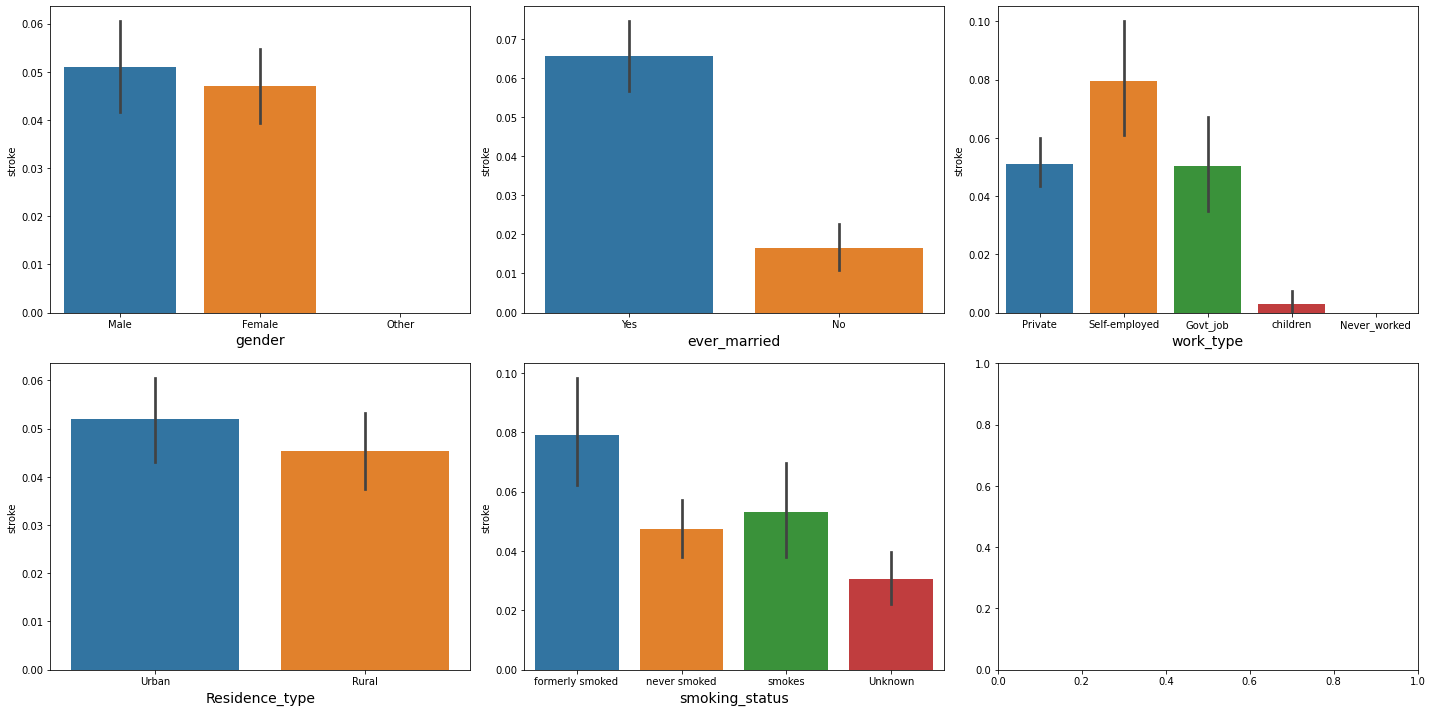

In [335]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes=[ax for axes_row in axes for ax in axes_row]
target='stroke'

for i,c in enumerate(categorical_features):
  sns.barplot(df[c],df[target],ax=axes[i])
  axes[i].set_xlabel(c,fontsize=14)

plt.tight_layout()
plt.show()

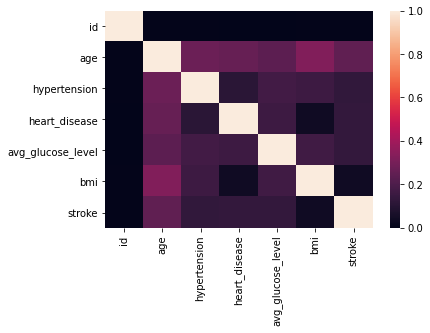

In [336]:
sns.heatmap(df.corr())
#by correlation matrix we can see that id column has very less correlation with stroke column

In [337]:
df=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [338]:
df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [339]:
df=df.drop(columns=['id'],axis=1)

In [340]:
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [341]:
X=df.drop('stroke',axis=1)
X.tail(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5105,80.0,1,0,83.75,28.893237,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,1,0,1,0,1,0,0,0,1,0,0
5109,44.0,0,0,85.28,26.200000,0,0,1,0,0,0,0,1,0,0,0


In [342]:
y=df['stroke']
y.tail(5)

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

In [343]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [344]:
x_train.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3378,51.0,0,0,219.17,29.800000,1,0,0,0,0,1,0,0,0,1,0
479,54.0,1,0,198.69,28.893237,1,0,1,0,1,0,0,0,0,0,1
3683,80.0,0,1,95.49,31.600000,1,0,1,0,0,1,0,0,0,0,0
2997,71.0,0,1,204.98,28.893237,1,0,1,0,1,0,0,1,1,0,0
286,23.0,0,0,94.09,30.900000,0,0,0,0,1,0,0,1,0,1,0


In [345]:
y_train.head(5)

3378    0
479     0
3683    0
2997    0
286     0
Name: stroke, dtype: int64

In [346]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **Model** **Training**

#Decision Tree

In [347]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [348]:
y_pred_tree=tree.predict(x_test)

In [349]:
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy is",accuracy_score(y_test,y_pred_tree))

Decision Tree Accuracy is 0.9033787788974511


#Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
y_pred_forest=forest.predict(x_test)


In [289]:
print("Random Forest Accuracy is",accuracy_score(y_test,y_pred_forest))

Random Forest Accuracy is 0.944279786603438


#SUPPORT VECTOR CLASSIFIER

In [290]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [291]:
y_pred=model.predict(x_test)

In [292]:
print("SVC Accuracy is",accuracy_score(y_test,y_pred))

SVC Accuracy is 0.943094250148192


#KNeighborsClassifier CLASSIFIER

In [293]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [294]:
y_pred_knc=knc.predict(x_test)

In [295]:
print("KNeighborsClassifier Accuracy is",accuracy_score(y_test,y_pred_knc))

KNeighborsClassifier Accuracy is 0.9359810314167161


#LOGISTIC REGRESSION

In [296]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [297]:
y_pred_log=log.predict(x_test)

In [298]:
print("Accuracy of Logistic Regression is",accuracy_score(y_test,y_pred_log))

Accuracy of Logistic Regression is 0.943687018375815


In [299]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid={'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

#fitting the model for grid search
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.955, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.955, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.955, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.956, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   59.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [300]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [301]:
from sklearn.svm import SVC
model_SVC=SVC(C=0.1,gamma=1,kernel='rbf')
model_SVC.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [302]:
model_SVC_pred=model_SVC.predict(x_test)

In [303]:
print("Accuracy is",accuracy_score(y_test,model_SVC_pred))

Accuracy is 0.943094250148192


In [304]:
import pickle
with open('stroke_tree.pkl','wb') as f:
  pickle.dump(tree,f)

In [353]:
model=pickle.load(open('stroke_tree.pkl','rb'))
model.predict([[80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0]])[0]
# model.predict([[61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0]])[0]

1

In [352]:
model=pickle.load(open('stroke_tree.pkl','rb'))
model.predict([[32.0,0,0,77.67,32.3,0,0,1,0,1,0,0,0,0,0,1]])[0]
# model.predict([[81.0,0,0,125.20,40.000000,0,0,1,0,0,1,0,1,0,1,0]])[0]

0